In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('drug.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
y = df['Drug']
x = df.drop(['Drug'],axis=1)

In [5]:
x_processed = pd.get_dummies(x)
print(x_processed.head())

   Age  Na_to_K  Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  Cholesterol_HIGH  \
0   23   25.355   True  False     True   False      False              True   
1   47   13.093  False   True    False    True      False              True   
2   47   10.114  False   True    False    True      False              True   
3   28    7.798   True  False    False   False       True              True   
4   61   18.043   True  False    False    True      False              True   

   Cholesterol_NORMAL  
0               False  
1               False  
2               False  
3               False  
4               False  


In [6]:
x_train,x_test,y_train,y_test = train_test_split(x_processed,y,test_size=0.2,random_state=42)

In [7]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [9]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n---Performance Evaluation---")
print(f"Accuracy:{accuracy:.4f}({accuracy*100:.2f}%)")


---Performance Evaluation---
Accuracy:1.0000(100.00%)


In [10]:
feature_names = x_processed.columns.tolist()
class_names = y.unique().tolist()


---Decision Tree Visualization---


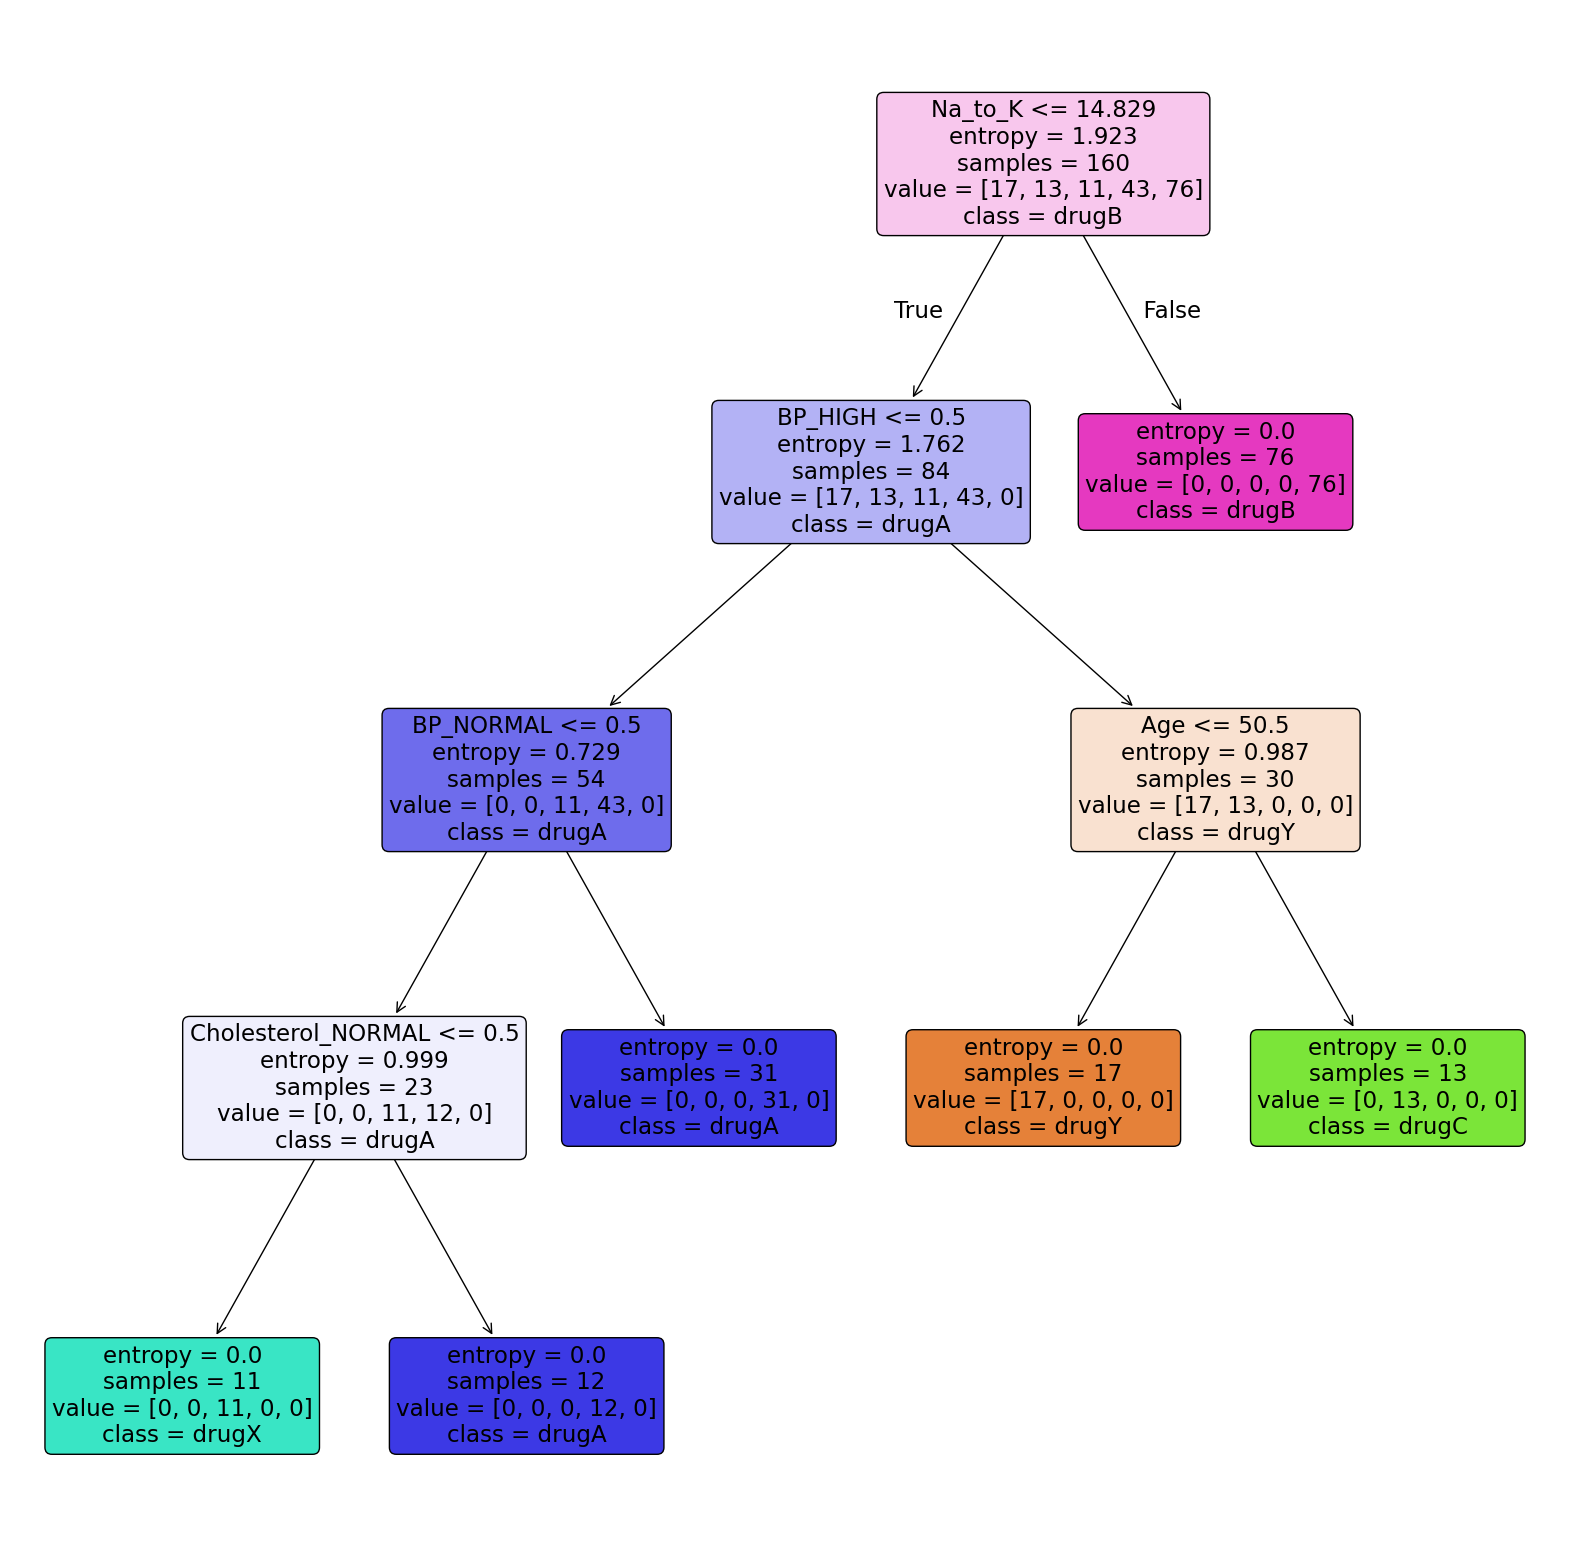

In [12]:
print("\n---Decision Tree Visualization---")
plt.figure(figsize=(20,20))
plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()